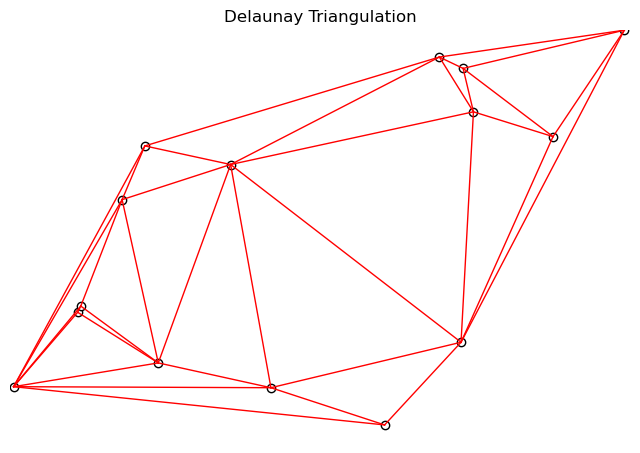

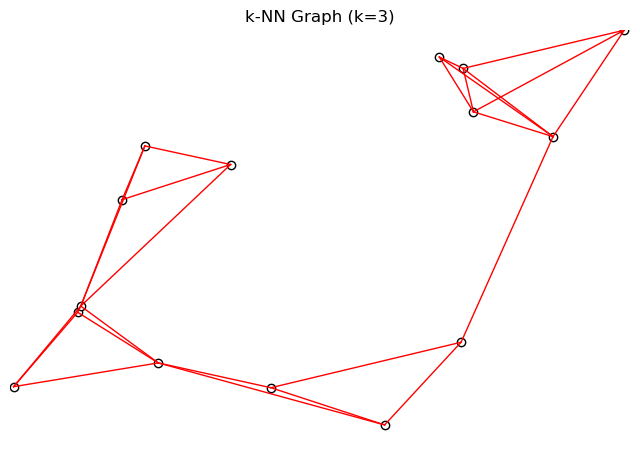

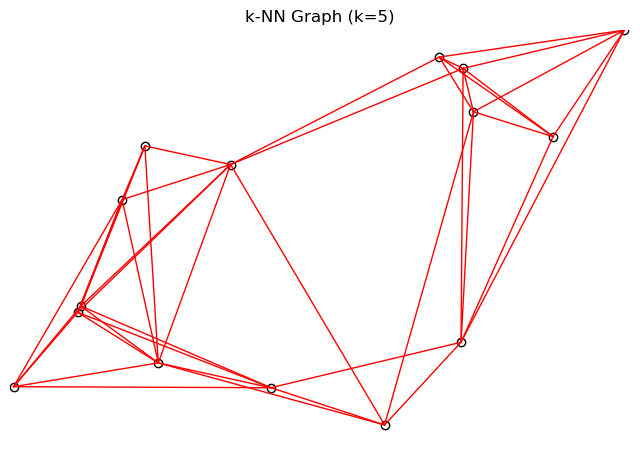

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
from scipy.spatial.distance import cdist

def plot_image_with_graph(img, kpt, edges, title=""):
    """
    Visualize an image with keypoints and graph edges.
    
    Parameters:
    - img: Input image (array-like)
    - kpt: Keypoints as a (2, N) array (first row: x, second row: y)
    - edges: List of (i, j) tuples representing graph edges between keypoints
    - title: Optional title for the plot
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.scatter(kpt[0], kpt[1], c='w', edgecolors='k')
    for i, j in edges:
        plt.plot([kpt[0, i], kpt[0, j]], [kpt[1, i], kpt[1, j]], 'r-', linewidth=1)
    plt.title(title)
    plt.axis('off')
    plt.show()

def delaunay_graph(kpts):
    """
    Constructs a Delaunay triangulation graph from keypoints.
    
    Parameters:
    - kpts: A (2, N) array of keypoints.
    
    Returns:
    - List of (i, j) tuples, each representing an undirected edge between keypoints.
    """
    # Transpose keypoints to (N, 2) for Delaunay (each row is [x, y])
    points = kpts.T
    tri = Delaunay(points)
    edges = set()
    
    # Each simplex (triangle) gives three edges.
    for simplex in tri.simplices:
        for i in range(3):
            for j in range(i+1, 3):
                edge = tuple(sorted([simplex[i], simplex[j]]))
                edges.add(edge)
    return list(edges)

def knn_graph(kpts, k):
    """
    Constructs a k-Nearest Neighbors (k-NN) graph from keypoints.
    
    Parameters:
    - kpts: A (2, N) array of keypoints.
    - k: Number of nearest neighbors to connect.
    
    Returns:
    - List of (i, j) tuples representing undirected graph edges.
    """
    points = kpts.T  # shape (N, 2)
    N = points.shape[0]
    # Compute pairwise Euclidean distances
    dists = cdist(points, points, metric='euclidean')
    edges = set()
    
    for i in range(N):
        # Exclude self-distance by sorting from index 1 onward
        nearest_indices = np.argsort(dists[i])[1:k+1]
        for j in nearest_indices:
            edge = tuple(sorted([i, j]))
            edges.add(edge)
    return list(edges)

# --- Example usage ---
if __name__ == "__main__":
    # For demonstration, let's create a synthetic image and some random keypoints.
    # In practice, you would load an image and its corresponding keypoints.
    img = np.ones((400, 600, 3))  # white background image
    # Generate 15 random keypoints within the image dimensions:
    num_keypoints = 15
    kpts = np.vstack([np.random.randint(0, img.shape[1], num_keypoints),
                      np.random.randint(0, img.shape[0], num_keypoints)])
    
    # Construct graphs:
    delaunay_edges = delaunay_graph(kpts)
    knn_edges_3 = knn_graph(kpts, k=3)
    knn_edges_5 = knn_graph(kpts, k=5)
    
    # Visualize the graphs:
    plot_image_with_graph(img, kpts, delaunay_edges, title="Delaunay Triangulation")
    plot_image_with_graph(img, kpts, knn_edges_3, title="k-NN Graph (k=3)")
    plot_image_with_graph(img, kpts, knn_edges_5, title="k-NN Graph (k=5)")
